In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
    
    def pull(self):
        drawn_value = np.random.randn() + self.m
        # update
        self.N += 1
        self.mean = (1.0 - (1.0/self.N))*self.mean + (1.0/self.N)*drawn_value
        return drawn_value

1.0 / 0.8434052033183216 / 32
2.0 / 2.1085050468945346 / 36
3.0 / 3.0050276363578967 / 932


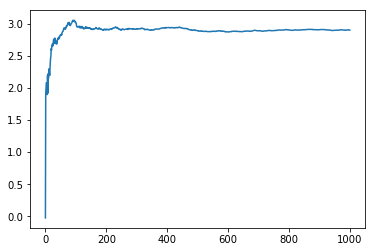

In [13]:
epsilon = 0.1
bandits = [Bandit(1.0), Bandit(2.0), Bandit(3.0)]
M = len(bandits)
N = 1000

data = np.empty(N)

for i in range(N):
    p = np.random.random()
    if p < epsilon:
        j = np.random.choice(M)
    else:
        j = np.argmax([bandit.mean for bandit in bandits])
    x = bandits[j].pull()
    data[i] = x

# plots
cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
plt.plot(cumulative_average)

# written outputs
print("\n".join(["{} / {} / {}".format(bandit.m, bandit.mean, bandit.N) for bandit in bandits]))